In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pydataset import data

iris = sns.load_dataset('iris')

Use seaborn's load_dataset function to load the iris database to answer the following questions:
1. What does the distribution of petal lengths look like?

        The most common lenght is between 1.4 and 1.5 cm 


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


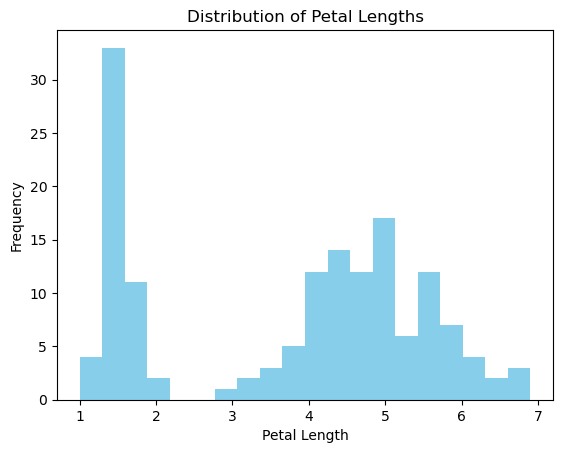

In [19]:
plt.hist(iris['petal_length'], bins= 20, color='skyblue')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Distribution of Petal Lengths')
plt.show()


In [20]:
iris.petal_length.mode()

0    1.4
1    1.5
Name: petal_length, dtype: float64

2. Is there a relationship between petal length and petal width?

        as the petal length increases, the petal width tends to increase as well.



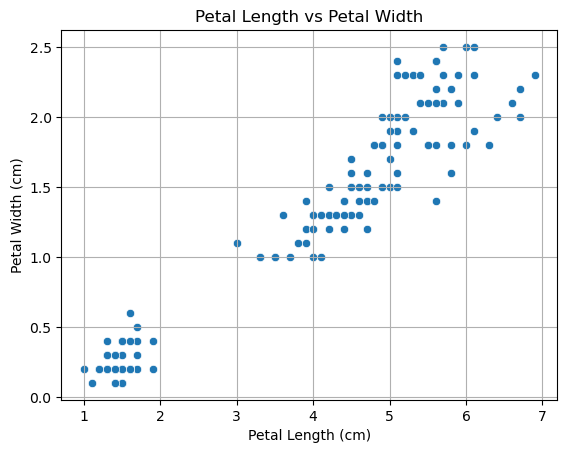

In [33]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.grid(True)
plt.show()

3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

        We can reasonably predict the setosa species with the lengh and width. The versicolor and virginica are much harder to distinguish by those measurenets alone, but there is a distict patern of sepal length above 7cm that leans virginica and a pattern below 5.5 that leans versicolor. 


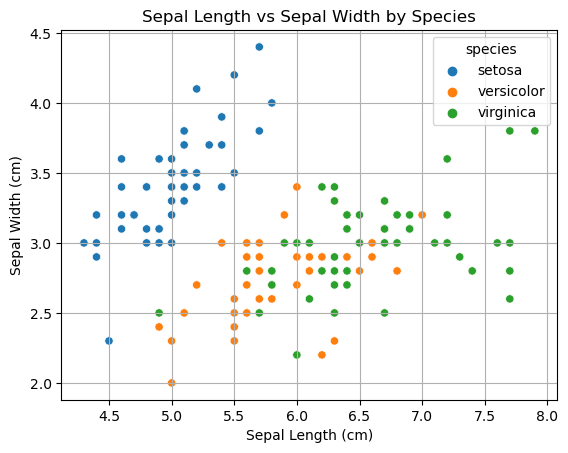

In [27]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width by Species')
plt.grid(True)
plt.show()

4. Which features would be best used to predict species?

        This is a much better way to predict species. Petal lengh and width, there is little overlap between species. 

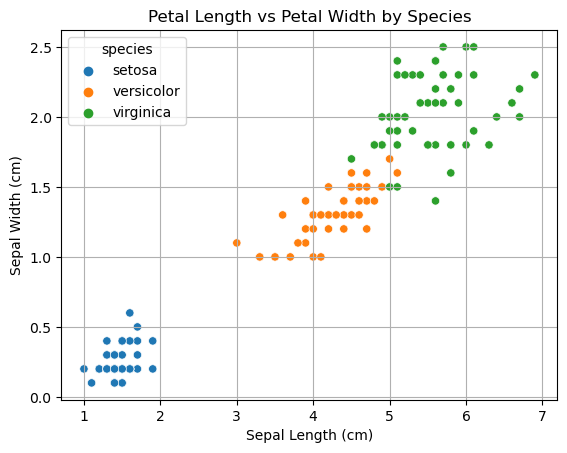

In [26]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Petal Length vs Petal Width by Species')
plt.grid(True)
plt.show()

1. Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

        X dataset I, II and III is the same.  

In [76]:
anscombe = sns.load_dataset('anscombe')

anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [73]:
g_anscombe = anscombe.groupby('dataset').agg(x_min= ('x', 'min'),
                                             x_max= ('x', 'max'),
                                             x_mean= ('x', 'mean'),
                                             y_min= ('y', 'min'),
                                             y_max= ('y', 'max'),
                                             y_mean= ('y', 'mean'))



In [82]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

    Plot the x and y values from the anscombe data. Each dataset should be in a separate column.


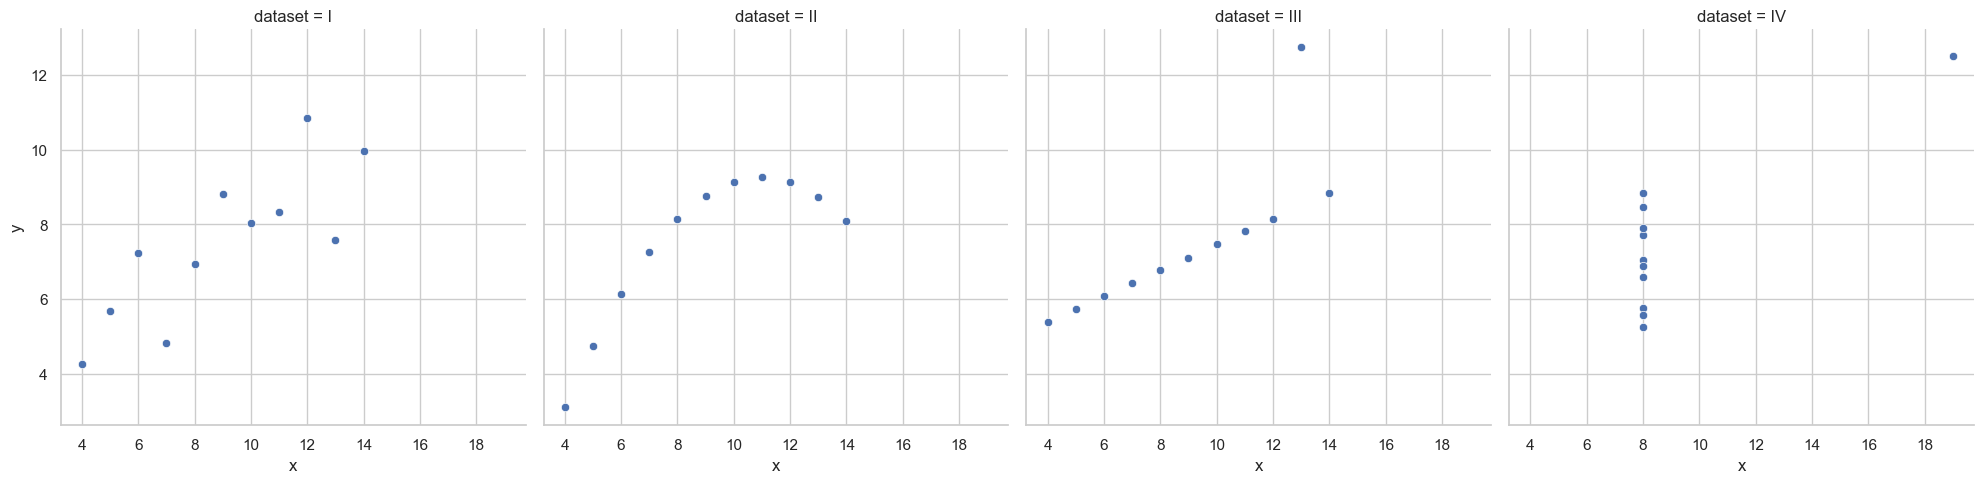

In [83]:
sns.relplot(data = anscombe, x = 'x', y = 'y', col = 'dataset')

2. Load the InsectSprays dataset from pydataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.


In [89]:
df_InsectSprays = data('InsectSprays')
df_InsectSprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [91]:
data('InsectSprays', show_doc= True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

Text(0.5, 1.0, 'effectiveness of the different insect sprays')

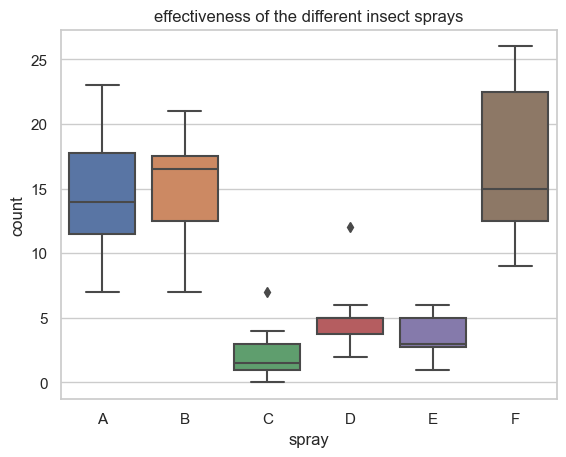

In [101]:
sns.boxplot(x='spray', y='count'  , data= df_InsectSprays)
plt.title('effectiveness of the different insect sprays')

3. Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:


In [228]:
df_swiss = data('swiss')
df_swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [217]:
df_swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


    * Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)


In [229]:
df_swiss['is_catholic'] = df_swiss.Catholic >= 50
df_swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


Does whether or not a province is Catholic influence fertility?
        
        Yes it does, Catholic provinces tend to be more fertile 

In [195]:
df_swiss.groupby('is_catholic').Fertility.mean()

is_catholic
False    66.220690
True     76.461111
Name: Fertility, dtype: float64

What measure correlates most strongly with fertility?

        Education, the more educated the less fertility

In [216]:
df_swiss.corr().abs().drop('Fertility', axis= 0)['Fertility'].idxmax()

'Education'

In [224]:
df_swiss.groupby('Education')['Fertility'].mean()

Education
1     72.500000
2     73.700000
3     77.150000
5     77.100000
6     71.075000
7     77.171429
8     75.925000
9     71.066667
10    63.000000
11    65.700000
12    68.040000
13    78.300000
15    76.900000
19    58.300000
20    54.300000
28    55.700000
29    43.750000
32    64.400000
53    35.000000
Name: Fertility, dtype: float64

In [220]:
df_swiss.groupby(pd.cut(df_swiss['Education'], 5))['Fertility'].mean()

Education
(0.948, 11.4]    73.854839
(11.4, 21.8]     69.509091
(21.8, 32.2]     51.900000
(32.2, 42.6]           NaN
(42.6, 53.0]     35.000000
Name: Fertility, dtype: float64

4. Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.


In [103]:
from sqlalchemy import text, create_engine
from env import get_connection

In [104]:
url  = get_connection('chipotle')
engine = create_engine(url)

In [110]:
query = '''
            SELECT *  

            FROM orders'''

In [111]:
text_query = text(query)

In [112]:
chipotle_df = pd.read_sql(text_query, engine.connect())
chipotle_df.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [125]:
chipotle_df.item_price = chipotle_df.item_price.str.replace('$','').astype(float)

/var/folders/6c/7ht5b3716k32pz2lmh_pzp8m0000gp/T/ipykernel_1890/2976225454.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle_df.item_price = chipotle_df.item_price.str.replace('$','').astype(float)


In [133]:
top_items = chipotle_df.groupby('item_name').item_price.sum().sort_values(ascending= False).head(4)
top_items

item_name
Chicken Bowl       7342.73
Chicken Burrito    5575.82
Steak Burrito      3851.43
Steak Bowl         2260.19
Name: item_price, dtype: float64

Text(0.5, 1.0, 'Top 4 Most Popular Items')

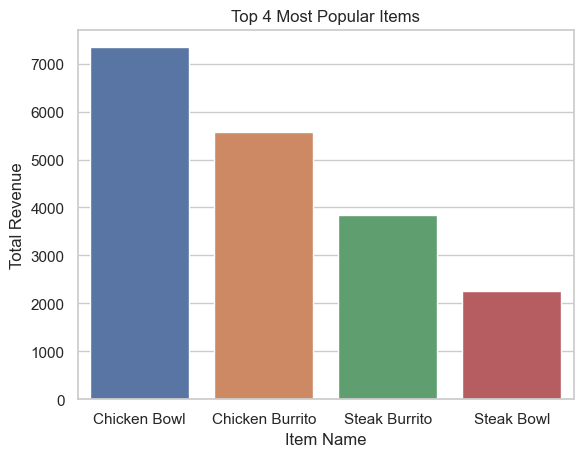

In [137]:
sns.barplot(x= top_items.index, y= top_items.values)

def format_currency(x, pos):
    return "${:,.2f}".format(x)

plt.xlabel('Item Name')
plt.ylabel('Total Revenue')
plt.title('Top 4 Most Popular Items')


5. Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.


In [185]:
df_sleepstudy = data('sleepstudy')
df_sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [ ]:
data('sleepstudy', show_doc= True)

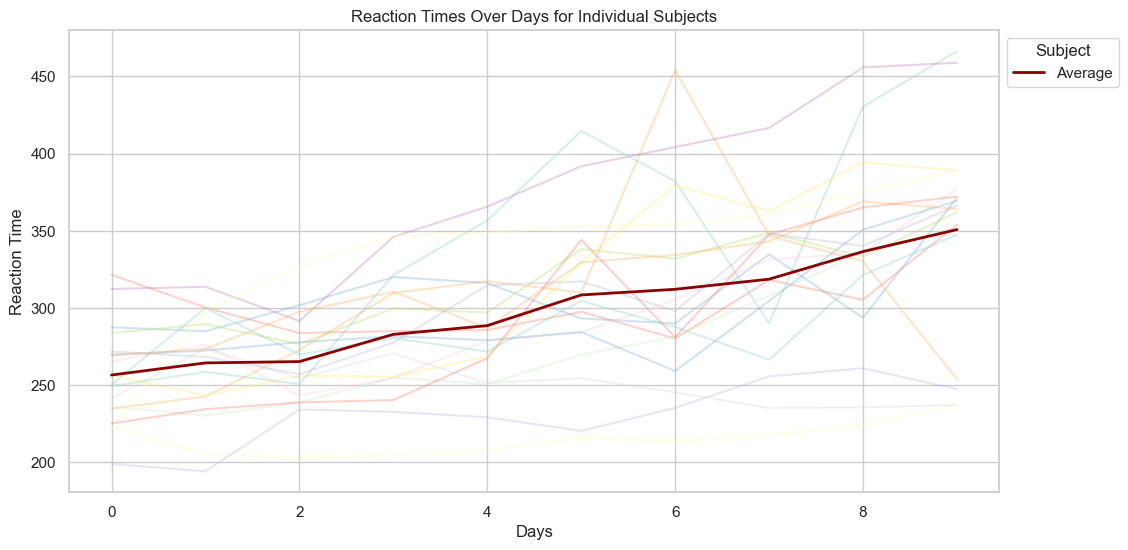

In [184]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Days', y='Reaction', hue='Subject', palette='Set3', data=df_sleepstudy, alpha=0.35, linewidth=1.5 ,legend=False)
sns.lineplot(x='Days', y='Reaction', data=df_sleepstudy.groupby('Days').Reaction.mean().reset_index(), color='DarkRed', linewidth=2, label='Average')

plt.xlabel('Days')
plt.ylabel('Reaction Time')
plt.title('Reaction Times Over Days for Individual Subjects')
plt.legend(title='Subject', bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()